# Warm up-Example1

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgnl

In [8]:
z = np.array([0]) # a zero @z=0
p = np.array([1.0/4, 1.0/2]) # poles of the system
b, a = sgnl.zpk2tf(z, p, 1) # since there is no gain k=1
b,a

(array([1., 0.]), array([ 1.   , -0.75 ,  0.125]))

In [9]:
# we do the partial fraction expansion by:
r, p, k = sgnl.residuez(b,a) # 
r,p,k
poless = np.roots(a) # returns the polynomial coefficients of the denominator

x[n] = $(\frac{-1}{4})^n * u[n] + 2* \frac{1}{2}^n * u[n]$

# Warm up-Example2

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgnl
%matplotlib notebook

In [11]:
num = np.array([1,0,0]) # we add zeros to match the size of num and 
denum = np.array([1, -3.0/4, 1.0/8]) # coeffs of denum
n, x = sgnl.dimpulse((num, denum, 1),x0=0, n=10)
x

(array([[1.        ],
        [0.75      ],
        [0.4375    ],
        [0.234375  ],
        [0.12109375],
        [0.06152344],
        [0.03100586],
        [0.01556396],
        [0.00779724],
        [0.00390244]]),)

<IPython.core.display.Javascript object>


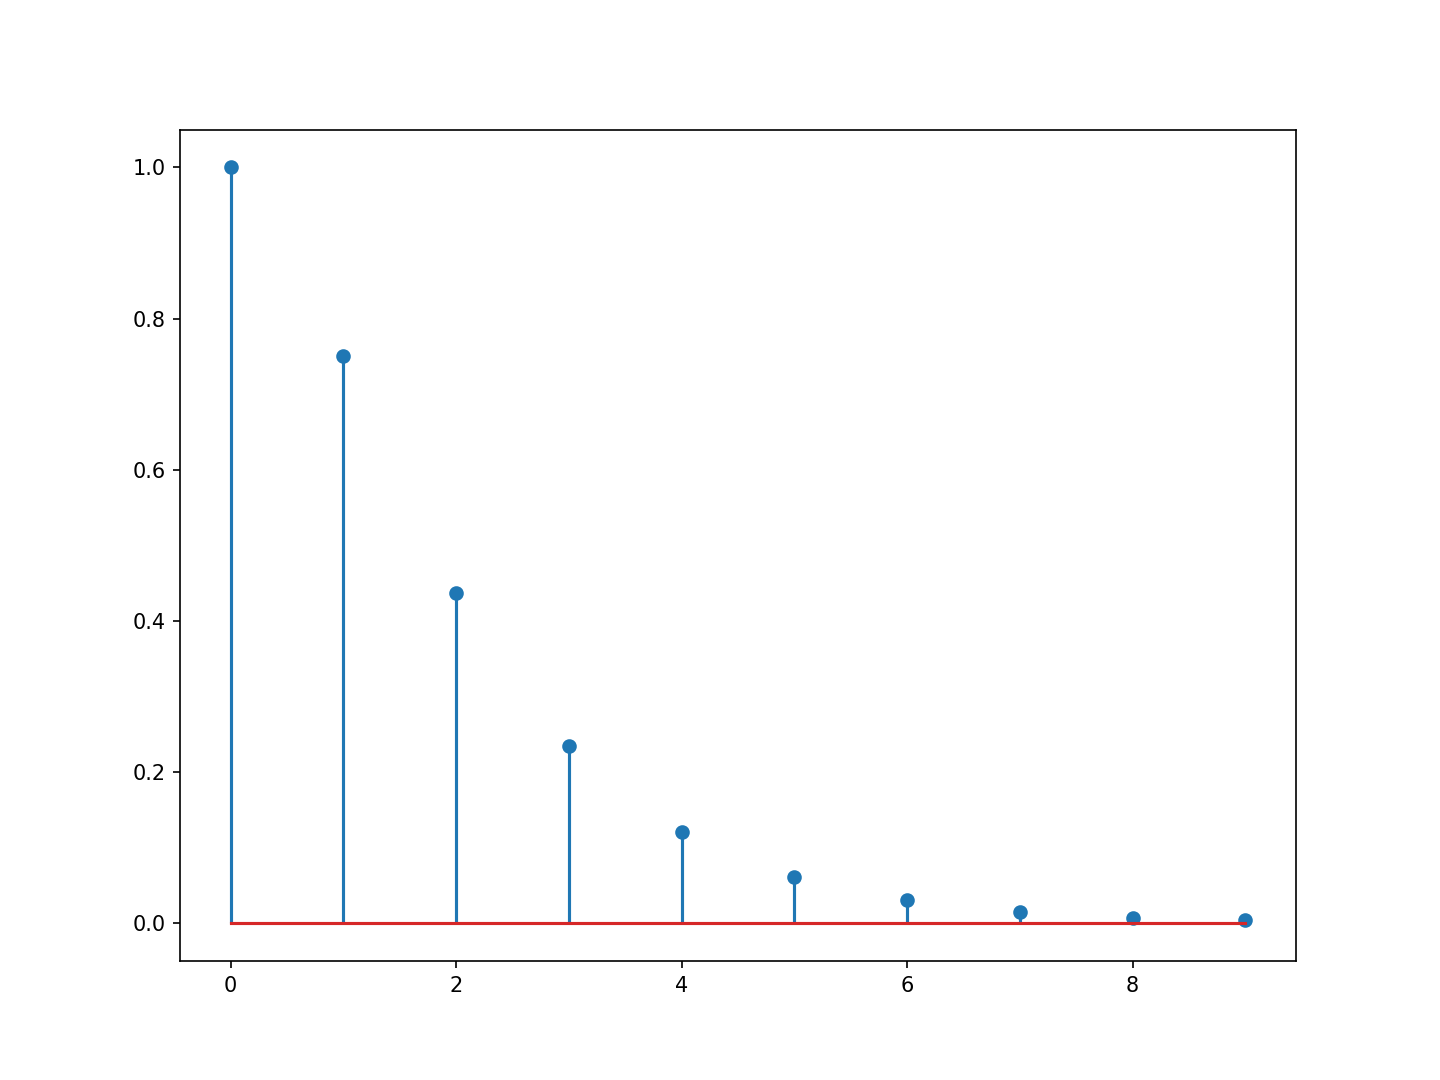

In [12]:
plt.figure()
plt.stem(n, np.squeeze(x))
plt.show()

# Warm up-Example3

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgnl
%matplotlib notebook

In [14]:
n = np.arange(0,10,1) # define the index vector for 10 points
xpf = -(1.0/4)**n + 2*(1.0/2)**n # result of example1
num = np.array([1, 0, 0]) # we add zeros to match the size of num an
denum = np.array([1, -3.0/4, 1.0/8]) # coeffs of denum
n1, xpse = sgnl.dimpulse((num, denum, 1),x0=0, n=10)
xpse = np.squeeze(xpse)

<IPython.core.display.Javascript object>


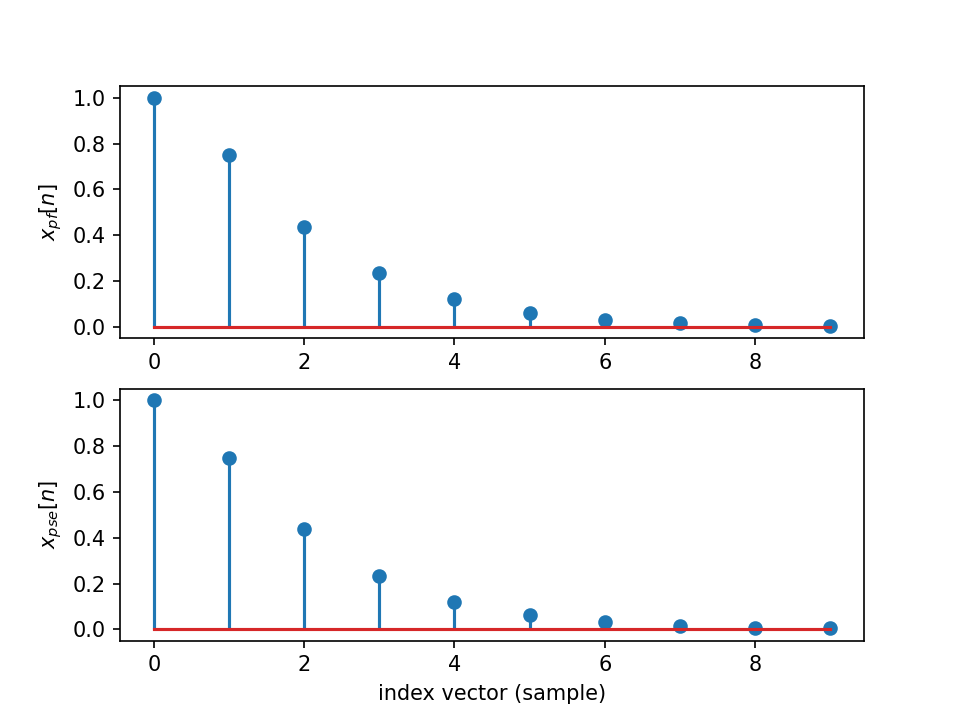

In [15]:
plt.figure()
plt.subplot(2,1,1), plt.stem(n, xpf), plt.ylabel('$x_{pf}[n]$')
plt.subplot(2,1,2), plt.stem(n, xpse), plt.ylabel('$x_{pse}[n]$')
plt.xlabel('index vector (sample)')
plt.show()

# Warm up-Example4

In [16]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.signal as sgnl
%matplotlib notebook

<IPython.core.display.Javascript object>


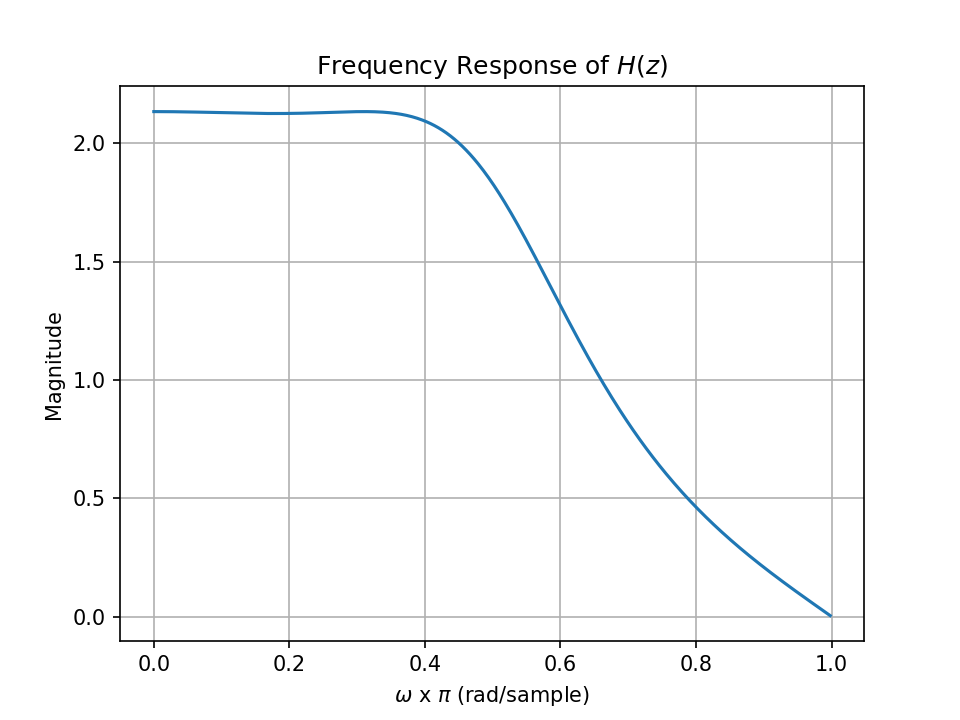

In [17]:
zeros = np.array([-1]) # observe that the numerator can be defined as transf
poles = np.array([1j/2, -1j/2, 1.0/4])
w, H = sgnl.freqz_zpk(zeros, poles, 1)
plt.figure()
plt.plot(w/np.pi, abs(H)) # plot the magnitude in logarithmic scale with blue 
plt.title('Frequency Response of $H(z)$')
plt.ylabel('Magnitude'), plt.xlabel('$\omega$ x $\pi$ (rad/sample)')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


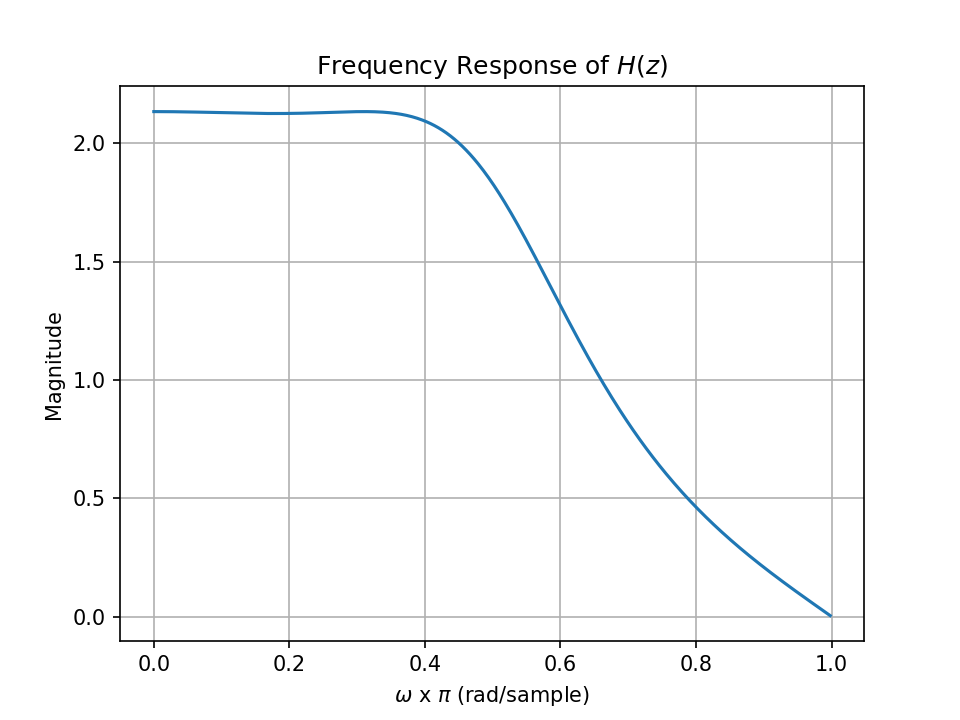

In [18]:
num, denum = sgnl.zpk2tf(zeros, poles, 1) # will return the coefficients b and a, r
w1, H_tf = sgnl.freqz(num, denum)
plt.figure()
plt.plot(w1/np.pi, abs(H_tf)) # plot the magnitude in logarithmic scale with b
plt.title('Frequency Response of $H(z)$')
plt.ylabel('Magnitude'), plt.xlabel('$\omega$ x $\pi$ (rad/sample)')
plt.grid()

<IPython.core.display.Javascript object>


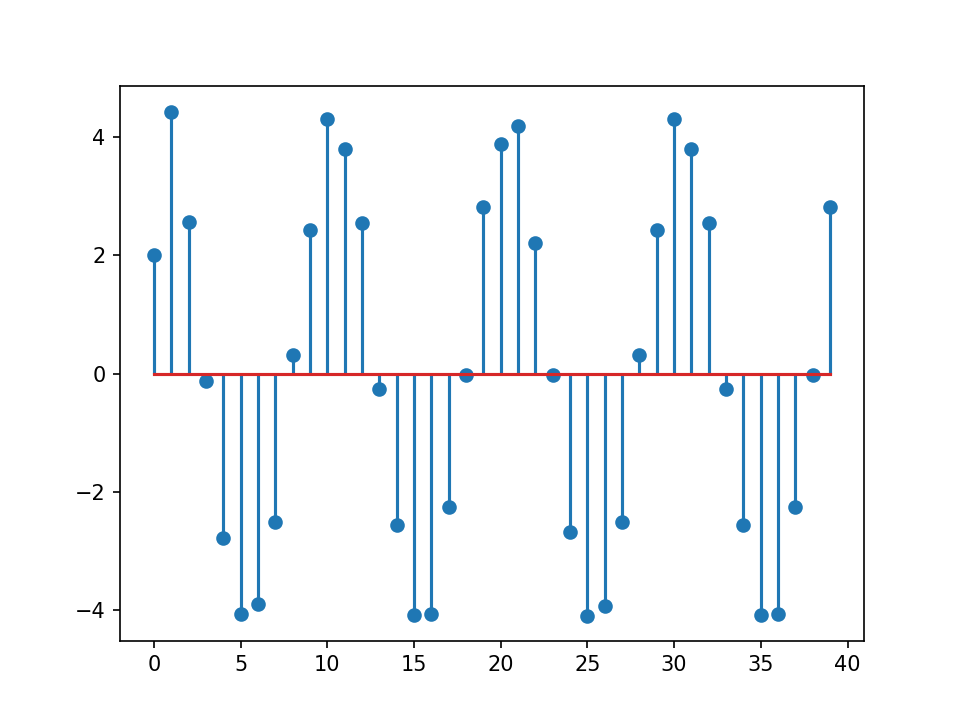

In [19]:
n = np.arange(0, 40, 1) # define the index vector
xn = 2*np.cos(0.2*np.pi*n) + np.sin(0.9*np.pi*n) # define the input signal
yn = sgnl.lfilter(num, denum, xn)
plt.figure()
plt.stem(n, yn)
plt.show()

# Warm up-Example5

In [20]:
import numpy as np              # for using basic array functions
import matplotlib.pyplot as plt # for this example, it may not be necessary

# the main package for signal processing is called "scipy" and we will use "signal" sub-package
import scipy.signal as sgnl 
# alternative syntax: from scipy import signal as sgnl

def zplane(b,a):

	# Input: numerator and denominator coefficients:
	zeross,poless,k = sgnl.tf2zpk(b, a)
	if not zeross.size:
		zeross = np.zeros(len(poless))
		
	if not poless.size:
		poless = np.zeros(len(zeross))

	tol = 1e-4

	real_p = np.real(poless).copy()
	real_z = np.real(zeross).copy()
	imag_p = np.imag(poless).copy()
	imag_z = np.imag(zeross).copy()

	if not real_z.size:
		real_z[abs(real_z) < tol] = 0
	if not imag_z.size:
		imag_z[abs(imag_z) < tol] = 0
	if not real_p.size:
		real_p[abs(real_p) < tol] = 0
	if not imag_p.size:
		imag_p[abs(imag_p) < tol] = 0

	z = np.round(real_z,2) + 1j*np.round(imag_z,2)
	p = np.round(real_p,2) + 1j*np.round(imag_p,2)

	# plot the unit circle
	N = 128
	m = np.arange(0,N,1)
	unitCircle = np.exp(1j*m*2*np.pi/N)

	plt.figure()
	plt.plot(np.real(unitCircle), np.imag(unitCircle), 'b--', linewidth=0.3)
	plt.xlabel('Real Part'), plt.ylabel('Imaginary Part')

	# calculate the plot limits
	Cz, z_counts = np.unique(z, return_counts=True)
	Cp, p_counts = np.unique(p, return_counts=True)

	zz = [idx1 for idx1, valz in enumerate(z_counts) if valz > 1]
	pp = [idx2 for idx2, valp in enumerate(p_counts) if valp > 1]
	zval = z_counts[zz]
	pval = p_counts[pp]
	zs = Cz[zz]
	ps = Cp[pp]

	real_roots = np.concatenate((np.real(p),np.real(z)))
	imag_roots = np.concatenate((np.imag(p),np.imag(z)))

	# adjust plot limits
	xlower = min(-1, min(real_roots)) - 0.3
	xupper = max(1,  max(real_roots)) + 0.3
	ylower = min(-1, min(imag_roots)) - 0.3
	yupper = max(1,  max(imag_roots)) + 0.3
	plt.xlim(xlower, xupper), plt.ylim(ylower, yupper)

	# plot axes
	Xaxis = np.arange(xlower, xupper, 0.1)
	Yaxis = np.arange(ylower, yupper, 0.1)
	plt.plot(np.real(Xaxis), np.imag(Xaxis), 'b--', linewidth=0.3)
	plt.plot(np.imag(Yaxis), np.real(Yaxis), 'b--', linewidth=0.3)

	# plot poles and zeros
	plt.plot(np.real(z), np.imag(z), 'ro',  markerfacecolor = 'none')
	plt.plot(np.real(p), np.imag(p), 'rx')

	if zz:
		txtz = str(zval)[1:-1]
		plt.annotate(txtz, xy=(np.real(zs)+0.1,np.imag(zs)+0.1))
		
	if pp:
		txtp = str(pval)[1:-1]
		plt.annotate(txtp, xy=(np.real(ps)+0.1,np.imag(ps)+0.1))

	plt.grid()
	plt.show()


# In[ ]:

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgnl
%matplotlib notebook
import zplane

<IPython.core.display.Javascript object>


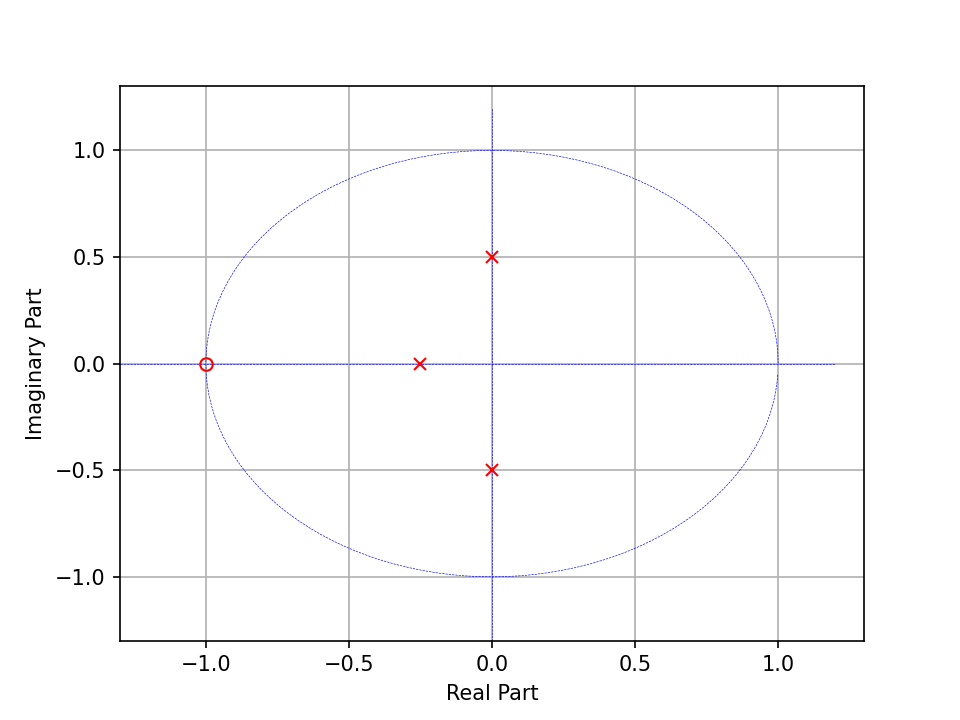

In [22]:
zeross = np.array([-1])
poless = np.array([-1j/2, 1j/2, -1/4])
k = 1 # the system has unity gain
b, a = sgnl.zpk2tf(zeross,poless,k)
zplane.zplane(b,a) 

<IPython.core.display.Javascript object>


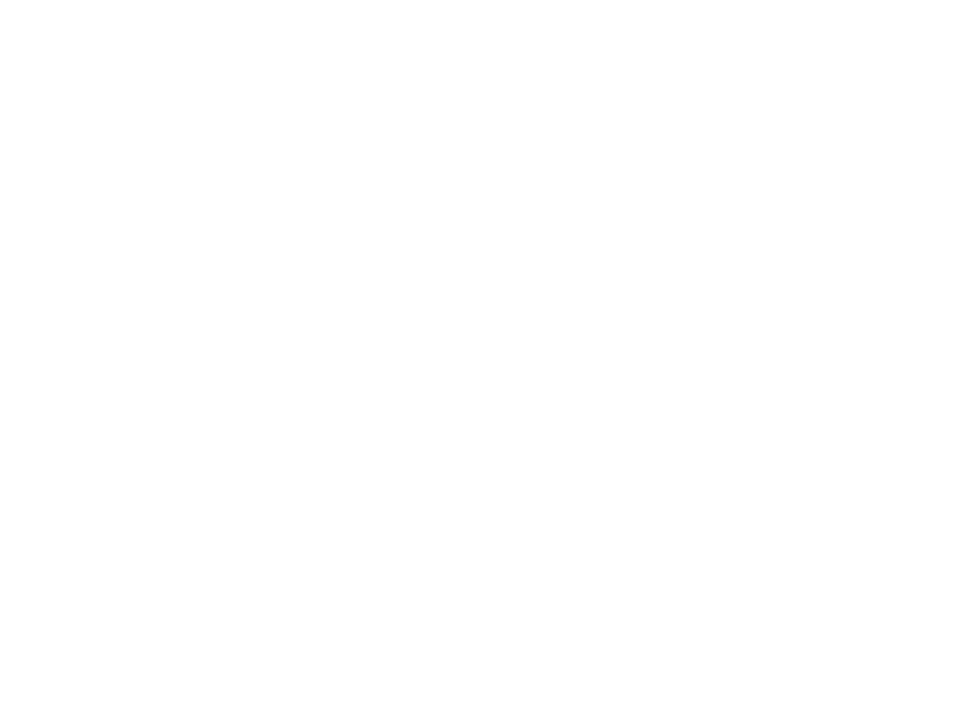

<IPython.core.display.Javascript object>


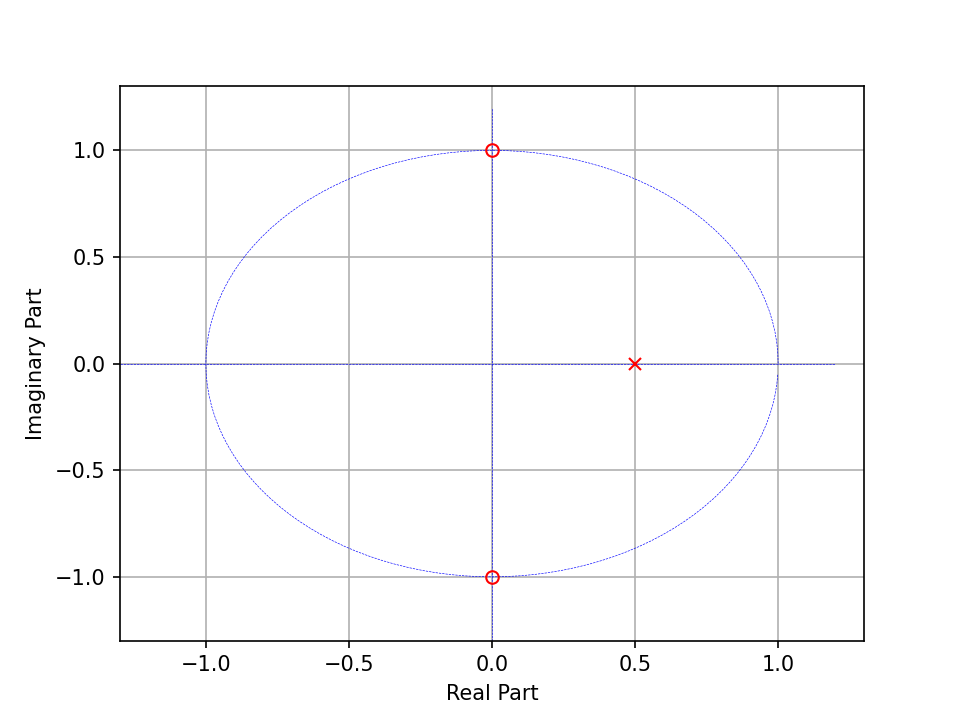

In [23]:
num = np.array([1, 0, 1]) # note that the coeff of z^(-1) term is zero.
denum = np.array([1, -1.0/2])
plt.figure()
zplane.zplane(num, denum)

<IPython.core.display.Javascript object>


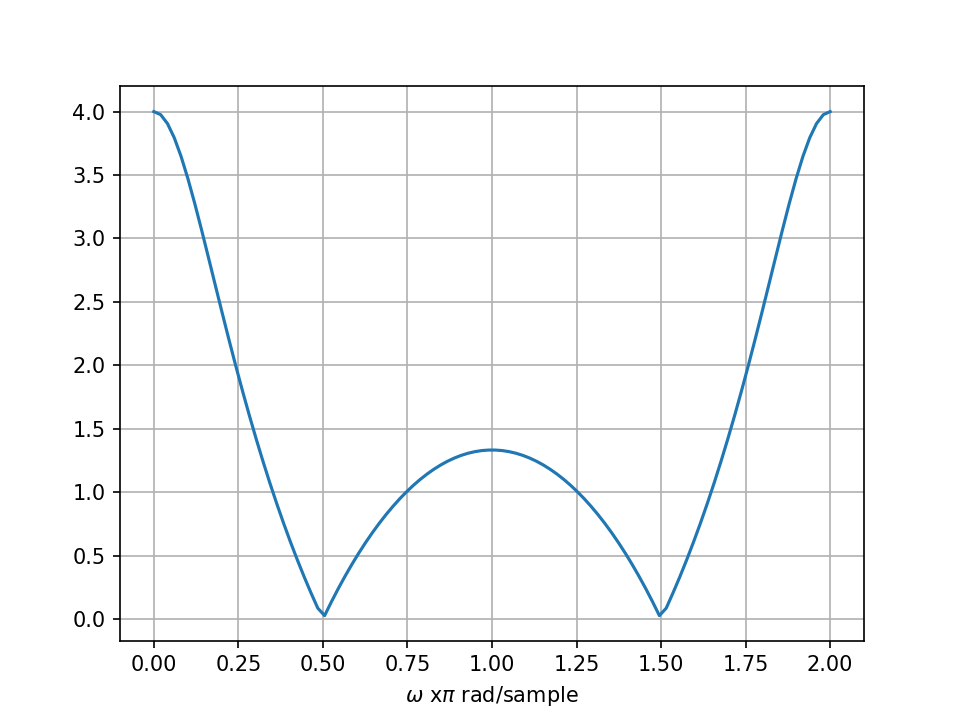

In [24]:
# Now, we define the frequency response as:
w = np.linspace(0, 2*np.pi, 100)
Hw = (1+np.exp(-2*1j*w))/(1-(1/2)*np.exp(-1j*w))
# alternatively, we could use the sgnl.freqz_zpk() function to calculate the Frequen
# or sgnl.freqz() function to calculate from the coefficients.
Hw_abs = abs(Hw)
plt.figure()
plt.plot(w/np.pi, Hw_abs)
plt.grid()
plt.xlabel('$\omega$ x$\pi$ rad/sample')
plt.show()

# Exercise

# H(z) = $\frac{Y(z)}{ X(z)} = \frac{1 + \frac{2}{3}z^{-1} + \frac{1}{9}z^{-2}}{1-\frac{1}{2}z^{-1} + 4z^{-2} - 2z^{-3}}$

<IPython.core.display.Javascript object>


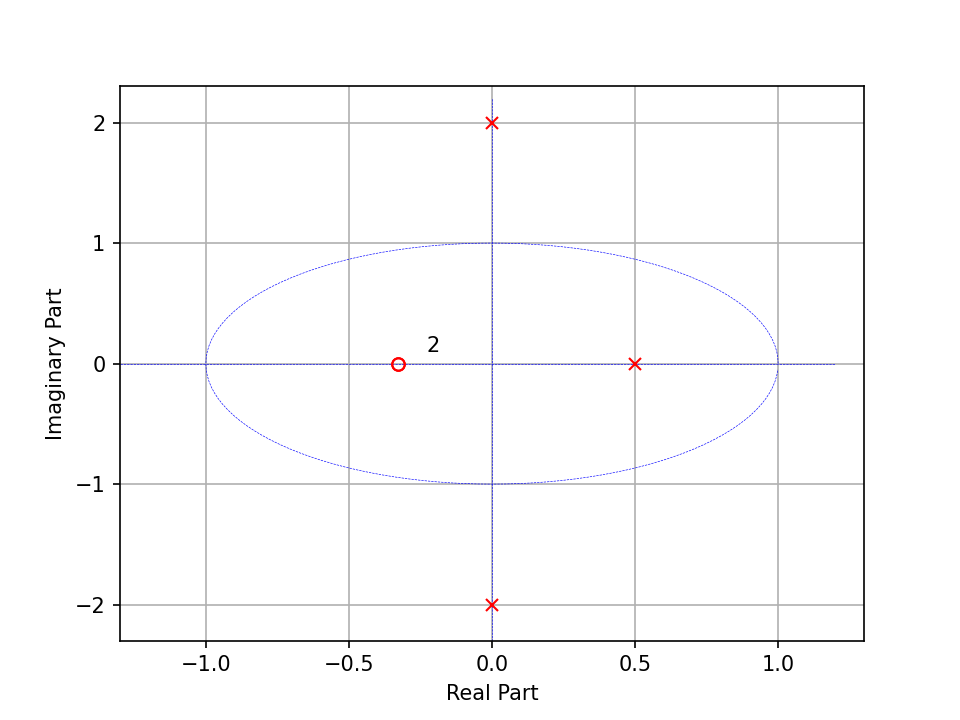

In [25]:
numerator = np.array([1, 2/3, 1/9])
denominator = np.array([1, -1/2, 4, -2])
zplane.zplane(numerator, denominator)

# According to z-plane above, at -1/3 there is double root zeros.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgnl
%matplotlib notebook

# H(z) = $\frac{Y(z)}{X(z)} = \frac{1 + \frac{2}{3}z^{-1} + \frac{1}{9}z^{-2}}{1-\frac{1}{2}z^{-1} + 4z^{-2} - 2z^{-3}}$

In [27]:
#Power Series Expansion method is used
num = np.array([1, 2/3, 1/9, 0]) #Numerator coefficients
denum = np.array([1, -1.0/2, 4, -2]) #denominator coefficients
n, h = sgnl.dimpulse((num, denum, 1),x0=0, n=30)

<IPython.core.display.Javascript object>


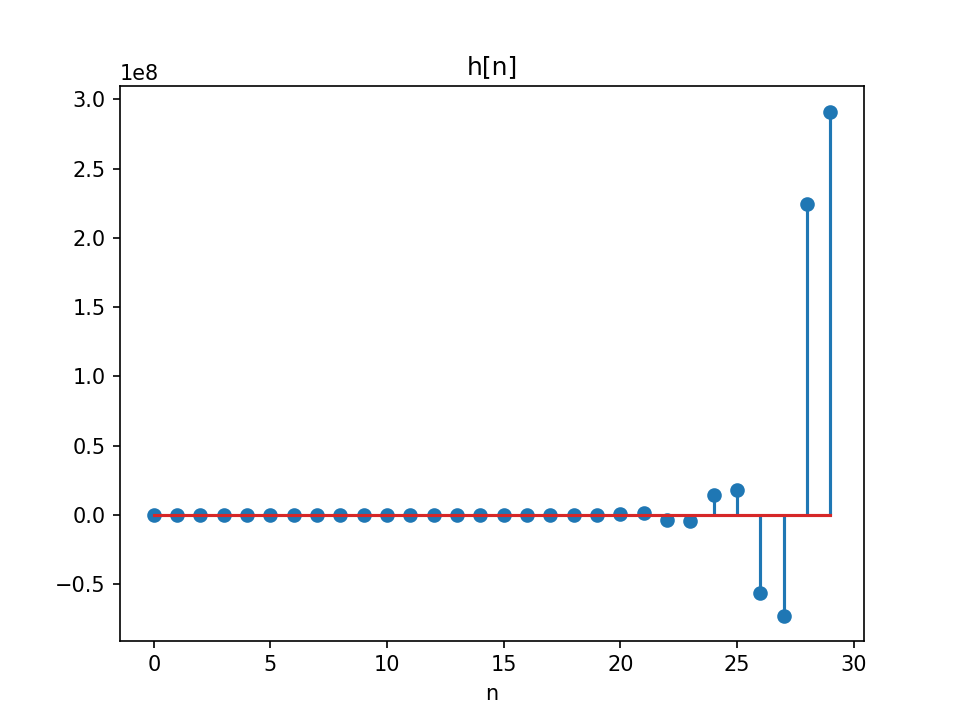

In [28]:
plt.figure()
plt.stem(n, np.squeeze(h))
plt.xlabel('n')
plt.title('h[n]')
plt.show()

# H(z) = $\frac{Y(z)}{X(z)} = \frac{1 + \frac{2}{3}z^{-1} + \frac{1}{9}z^{-2}}{1-\frac{1}{2}z^{-1} + 4z^{-2} - 2z^{-3}}$

<IPython.core.display.Javascript object>


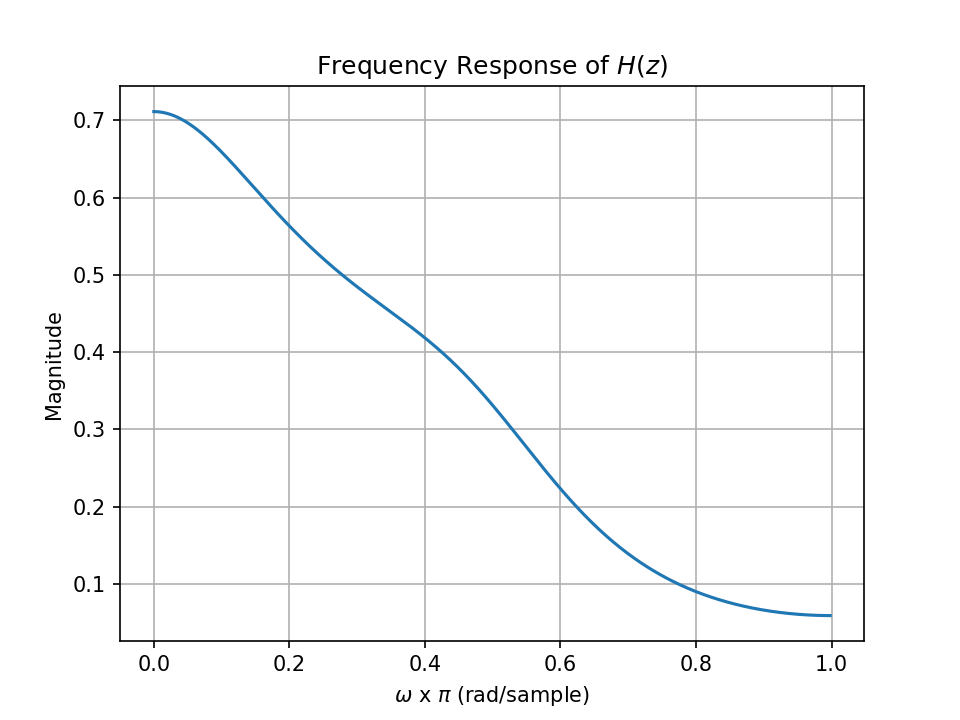

In [29]:
zeros = np.array([-1/3, -1/3]) # observe that the numerator can be defined as transf
poles = np.array([-2j, 2j, 0.5])
w, H = sgnl.freqz_zpk(zeros, poles, 1)
plt.figure()
plt.plot(w/np.pi, abs(H)) # plot the magnitude in logarithmic scale with blue 
plt.title('Frequency Response of $H(z)$')
plt.ylabel('Magnitude'), plt.xlabel('$\omega$ x $\pi$ (rad/sample)')
plt.grid()

<IPython.core.display.Javascript object>


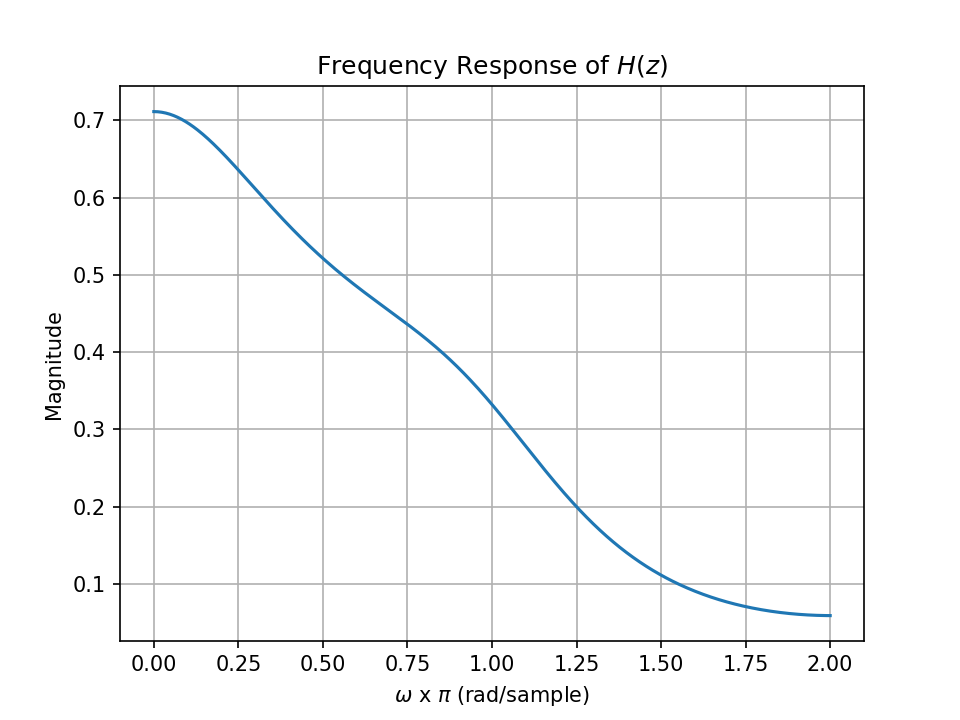

In [30]:
#Z to transfer function
num, denum = sgnl.zpk2tf(zeros, poles, 1)
w1, H_tf = sgnl.freqz(num, denum)
w1 = np.linspace(0, 2*np.pi, 512)
plt.figure()
plt.plot(w1/np.pi, abs(H_tf))
plt.title('Frequency Response of $H(z)$')
plt.ylabel('Magnitude'), plt.xlabel('$\omega$ x $\pi$ (rad/sample)')
plt.grid()

# x[n] = $\delta [n]$

<IPython.core.display.Javascript object>


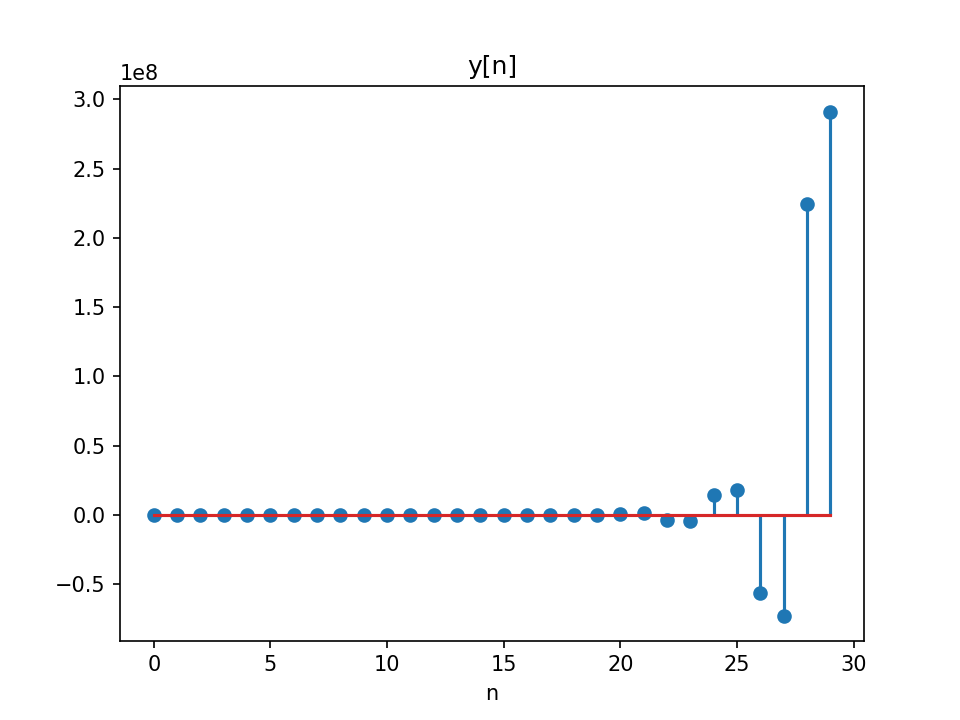

In [31]:
n = np.arange(0, 30, 1)
xn = sgnl.unit_impulse(30)
yn = sgnl.lfilter(num, denum, xn)
plt.figure()
plt.stem(n, yn)
plt.xlabel('n')
plt.title('y[n]')
plt.show()

# H(z) = $\frac{z^2}{(z+1)(z-1)^2}$ = $\frac{z^{-1}}{(1+z^{-1})(1-z^{-1})^2}$

In [32]:
#Like warm up example1
z = np.array([0, 0])
p = np.array([-1, 1, 1])
b, a = sgnl.zpk2tf(z, p, 1)
b,a

r, p, k = sgnl.residue(b,a) # Since there are positive exponents we didn't use residuez.
poless = np.roots(a) 
r, p, k

(array([0.25, 0.75, 0.5 ]), array([-1.,  1.,  1.]), array([], dtype=float64))

Therefore, with inspection method h[n] = $0.25 * (-1)^{n-1} * u[n-1] + (0.75) * 1^{n-1} *u[n-1] + (0.5) * (n-1) * 1^{n-1} * u[n-1]$

<IPython.core.display.Javascript object>


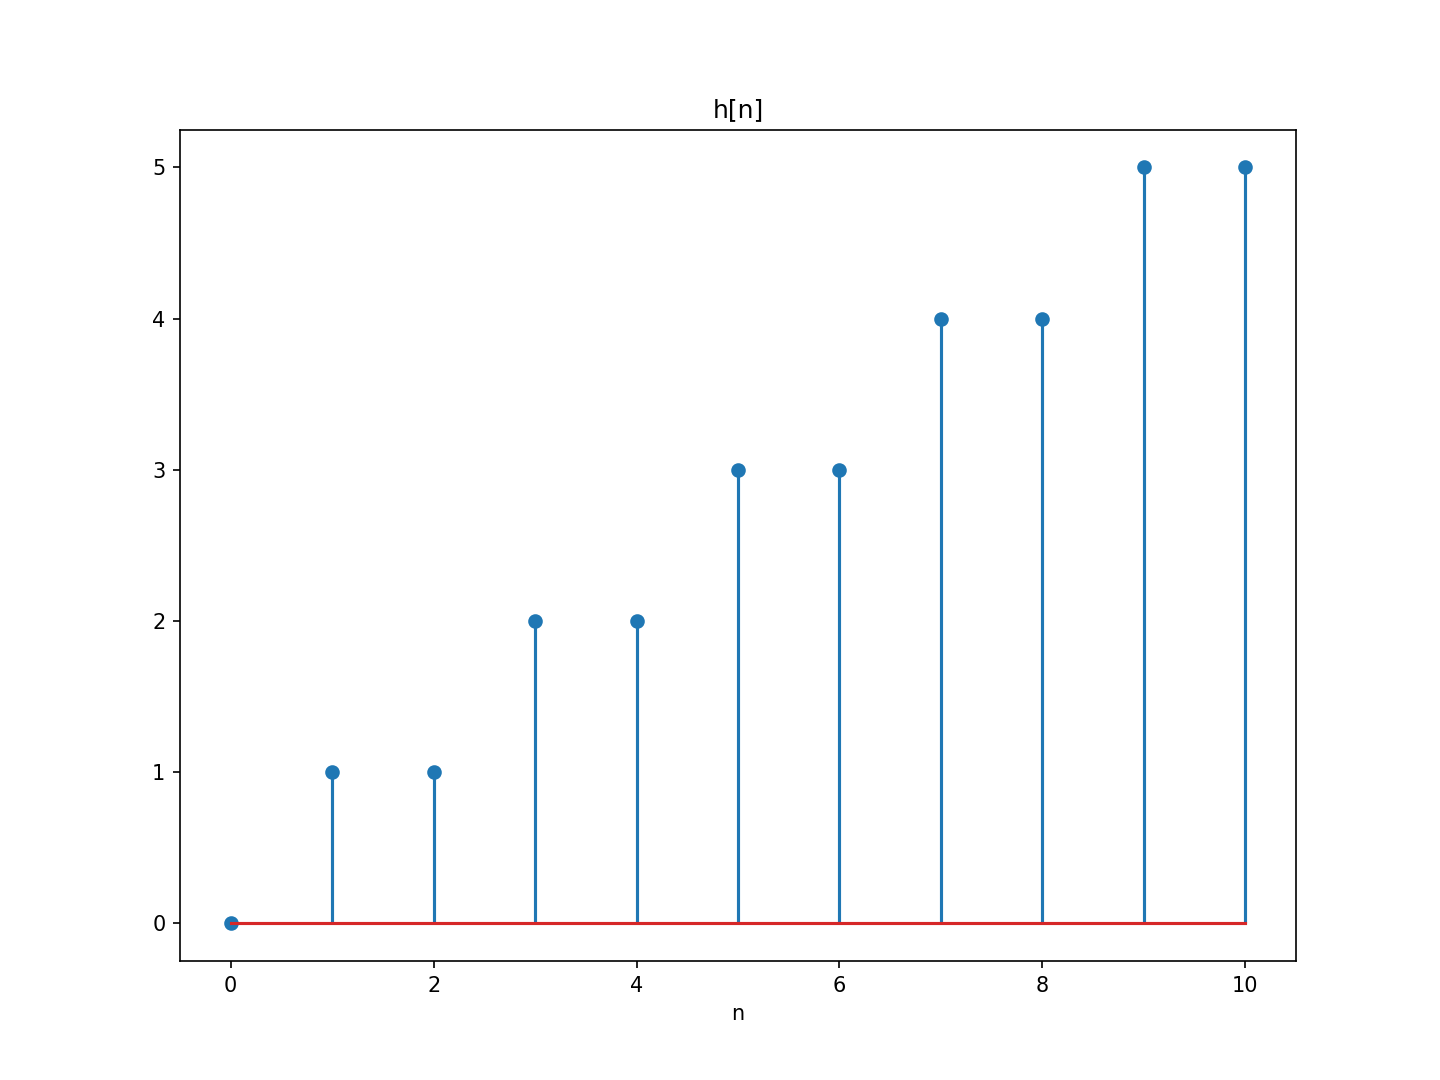

In [33]:
def step_eksi_bir(x): #u[n-1]
    if np.any(x)>=1:
        return 1
    else:
        return 0
    
n = np.arange(0, 11, 1)
hn = 0.25 * np.power(-1, (n-1), dtype = float) * step_eksi_bir(n) + 0.75 * step_eksi_bir(n) + 0.5 * (n-1) * step_eksi_bir(n)
plt.figure()
plt.stem(n, hn)
plt.xlabel('n')
plt.title('h[n]')
plt.show()

# H(z) = $\frac{z^2}{(z+1)(z-1)^2}$ = $\frac{z^{-1}}{(1+z^{-1})(1-z^{-1})^2}$

C:\Users\PC\anaconda3\lib\site-packages\scipy\signal\filter_design.py:1625: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


<IPython.core.display.Javascript object>


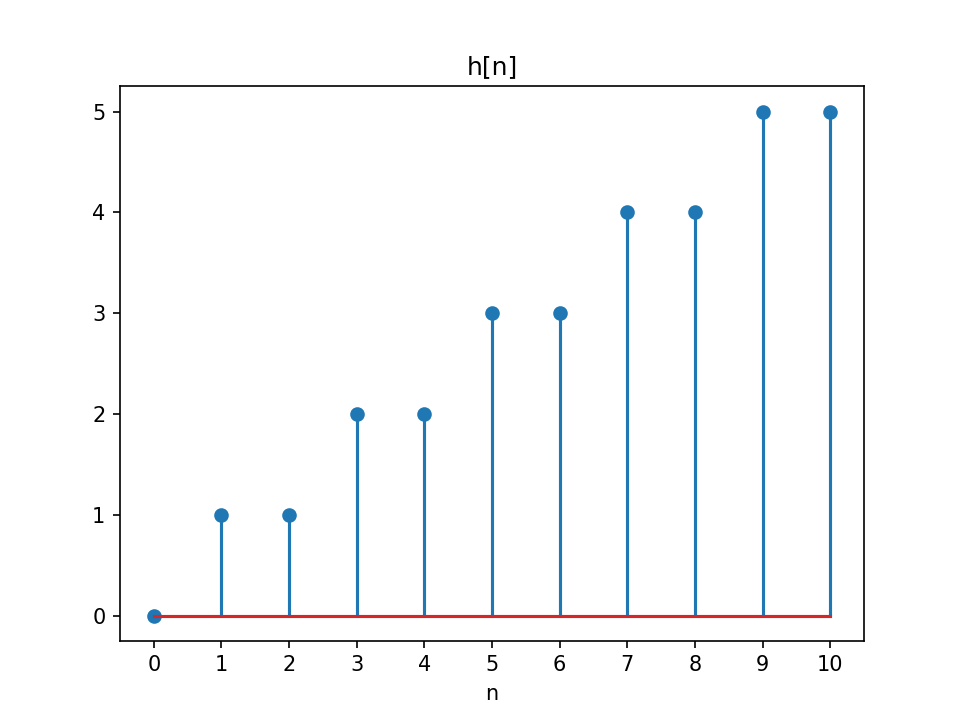

In [34]:
#Like warm up example2
num = np.array([0, 1, 0, 0]) #Numerator coefficients
denum = np.array([1, -1, -1, 1])#Denominator coefficients
n, h = sgnl.dimpulse((num, denum, 1),x0=0, n=11)
plt.figure()
plt.stem(n, np.squeeze(h))
plt.xticks(n)
plt.xlabel('n')
plt.title('h[n]')
plt.show()

C:\Users\PC\anaconda3\lib\site-packages\scipy\signal\filter_design.py:1625: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


<IPython.core.display.Javascript object>


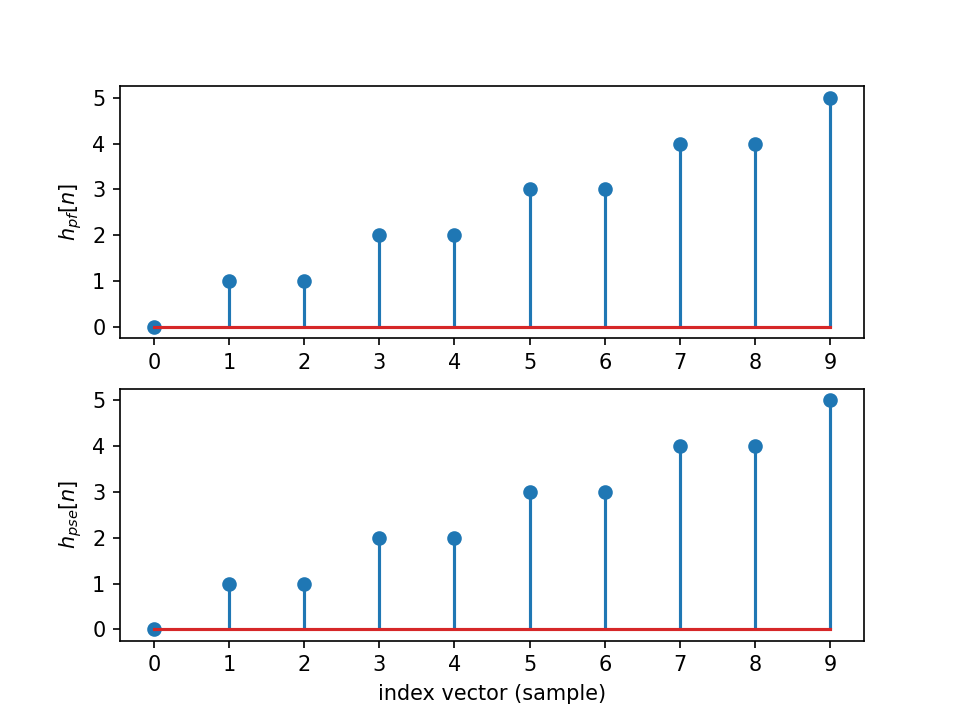

In [35]:
#Like warm up example3, we compare
n = np.arange(0,10,1) # define the index vector for 10 points
hpf = 0.25 * np.power(-1, (n-1), dtype = float) * step_eksi_bir(n) + 0.75 * step_eksi_bir(n) + 0.5 * (n-1) * step_eksi_bir(n) #Ornek7 sonucu
num = np.array([0, 1, 0, 0]) #Pay katsayıları
denum = np.array([1, -1, -1, 1])#Payda katsayıları
n, hpse = sgnl.dimpulse((num, denum, 1),x0=0, n=10)#Warm up example2 result
hpse = np.squeeze(hpse)

plt.figure()
plt.subplot(2,1,1), plt.stem(n, hpf), plt.ylabel('$h_{pf}[n]$'), plt.xticks(n)
plt.subplot(2,1,2), plt.stem(n, hpse), plt.ylabel('$h_{pse}[n]$'), plt.xticks(n)
plt.xlabel('index vector (sample)')
plt.show()

When solved analytically, we find: H(z) = $\frac{0.25}{z+1}$ + $\frac{0.75}{z-1}$ + $\frac{0.5}{(z-1)^2}$ . When we perform inverse z transform for each term, we find $0.25 * (-1)^{n-1} * u[n-1] + (0.75) * 1^{n-1} *u[n-1] + (0.5) * (n-1) * 1^{n-1} * u[n-1]$ .Answers are same


# H(z) = $\frac{1+3z^{-1} +\frac{11}{6}z^{-2} + \frac{1}{3}z^{-3}}{1+\frac{5}{6}z^{-1} +\frac{1}{6}z^{-2}}$

In [36]:
b = np.array([1, 3, 11/6, 1/3]) 
a = np.array([1, 5/6, 1/6, 0]) 
z, p, k = sgnl.tf2zpk(b, a) 
print("zeros, z:", z)
print("poles, p:", p)
print("gain, k:", k)

#Like warm up example1
b, a = sgnl.zpk2tf(z, p, 1)
b,a

r, p, k = sgnl.residue(b,a) #Since there are positive exponents we didn't use residuez.
poless = np.roots(a) 
r, p, k

zeros, z: [-2.25147697+0.j         -0.37426152+0.08932682j -0.37426152-0.08932682j]
poles, p: [-0.5        -0.33333333  0.        ]
gain, k: 1.0


(array([ 2.        , -0.33333333,  0.5       ]),
 array([ 0.        , -0.33333333, -0.5       ]),
 array([1.]))

Then h[n] = $\delta[n]$ + $2\delta [n-1]$ + $(\frac{-1}{3})^{n} * u[n-1]$ + $0.5 * (-0.5)^{n-1} * u[n-1]$

<IPython.core.display.Javascript object>


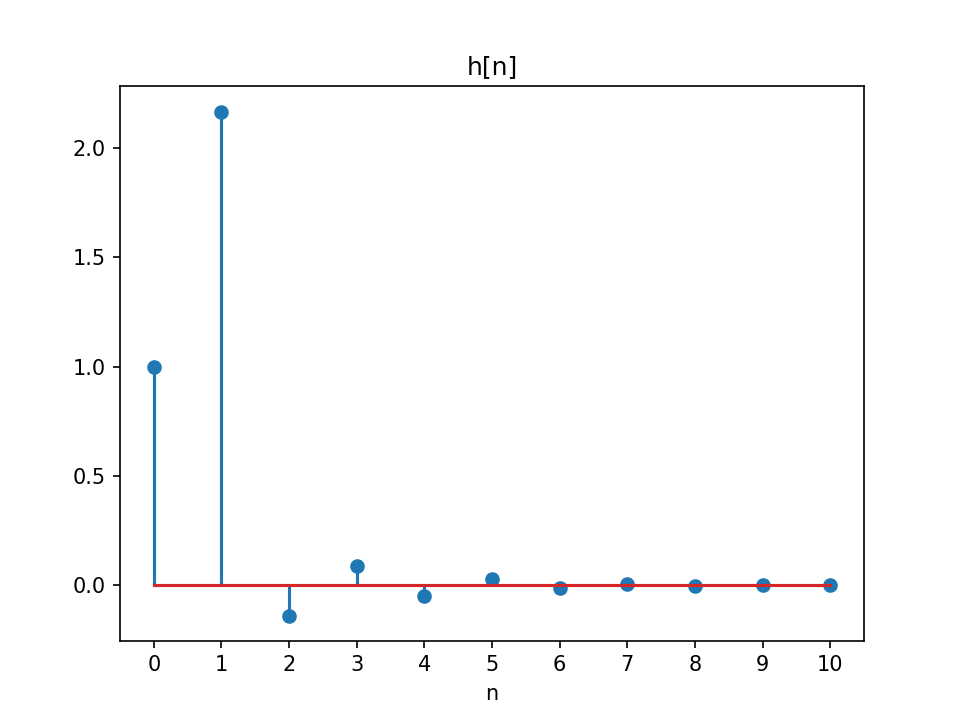

In [37]:
n = np.arange(0, 11, 1)
hn = sgnl.unit_impulse(11) + 2 * sgnl.unit_impulse(11, 1) + np.power(-1/3, n, dtype = float) * step_eksi_bir(n) + 0.5 * np.power(-0.5, n-1, dtype = float) * step_eksi_bir(n)
plt.figure()
plt.stem(n, hn)
plt.xlabel('n')
plt.xticks(n)
plt.title('h[n]')
plt.show()

# H(z) = $\frac{1+3z^{-1} +\frac{11}{6}z^{-2} + \frac{1}{3}z^{-3}}{1+\frac{5}{6}z^{-1} +\frac{1}{6}z^{-2}}$

<IPython.core.display.Javascript object>


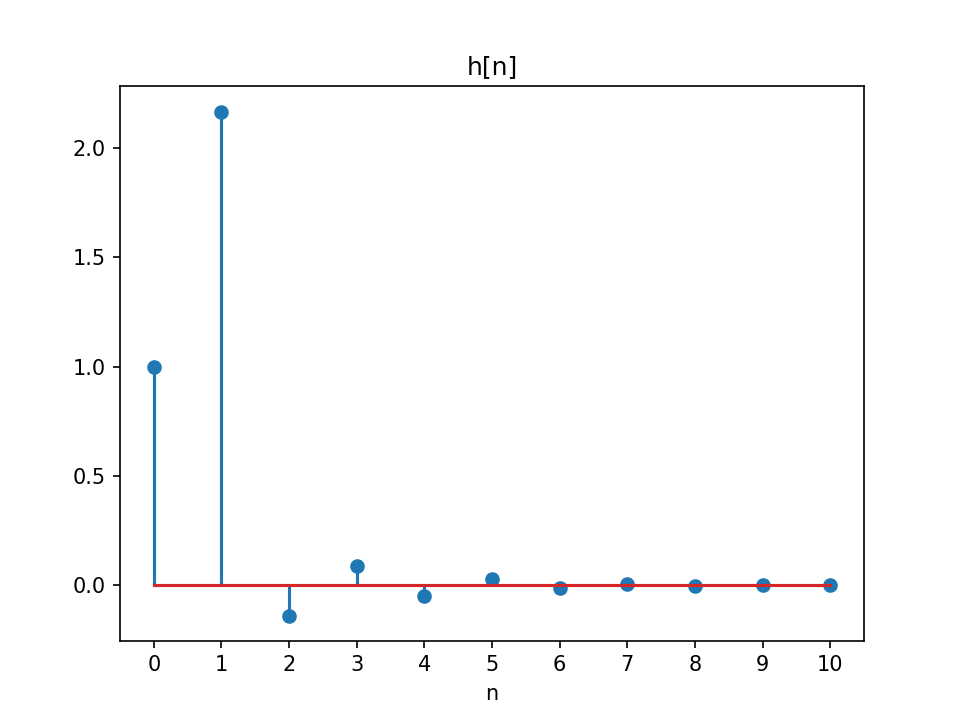

In [38]:
#Like warm up example2
num = np.array([1, 3, 11/6, 1/3]) #Numerator coefficients
denum = np.array([1, 5/6, 1/6, 0])#Denominator coefficients
n, h = sgnl.dimpulse((num, denum, 1),x0=0, n=11)
plt.figure()
plt.stem(n, np.squeeze(h))
plt.xticks(n)
plt.xlabel('n')
plt.title('h[n]')
plt.show()

<IPython.core.display.Javascript object>


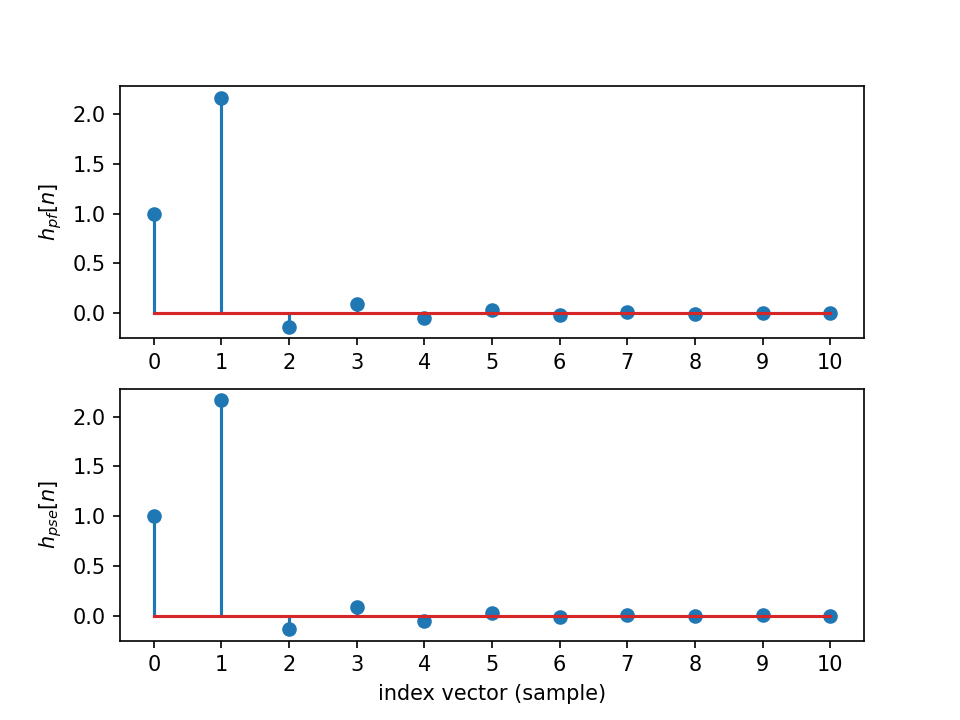

In [39]:
#Like in warm up example3, we compare
n = np.arange(0,11,1) # define the index vector for 10 points
hpf = sgnl.unit_impulse(11) + 2 * sgnl.unit_impulse(11, 1) + np.power(-1/3, n, dtype = float) * step_eksi_bir(n) + 0.5 * np.power(-0.5, n-1, dtype = float) * step_eksi_bir(n)
num = np.array([1, 3, 11/6, 1/3]) #Numerator coefficients
denum = np.array([1, 5/6, 1/6, 0])#Denominator coefficients
n, hpse = sgnl.dimpulse((num, denum, 1),x0=0, n=11)#Warm up example2 result
hpse = np.squeeze(hpse)

plt.figure()
plt.subplot(2,1,1), plt.stem(n, hpf), plt.ylabel('$h_{pf}[n]$'), plt.xticks(n)
plt.subplot(2,1,2), plt.stem(n, hpse), plt.ylabel('$h_{pse}[n]$'), plt.xticks(n)
plt.xlabel('index vector (sample)')
plt.show()

When analytically solved, we find H(z) = $1 + \frac{2}{z}$ - $\frac{\frac{1}{3}}{z+\frac{1}{3}}$ + $\frac{0.5}{z+\frac{1}{2}}$ .When inverse z transform is performed for each term, we find  $\delta[n] + 2 * \delta[n-1] + (\frac{-1}{3})^n * u[n-1] + 0.5 * (-0.5)^{n-1} * u[n-1]$ .Answers are same.

$H[z] = \frac{10(1-\frac{1}{\sqrt{2}}z^{-1})}{(1-e^{j\frac{\pi}{4}}z^{-1})(1-e^{-j\frac{\pi}{4}}z^{-1})(1-0.5z^{-1})}$

In [40]:
z = np.array([1/np.sqrt(2), 0, 0])
p = np.array([np.exp(1j*np.pi/4), np.exp(-1j*np.pi/4), 0.5])
#Like in warm up example1
b, a = sgnl.zpk2tf(z, p, 10)
b,a

r, p, k = sgnl.residuez(b,a) #Since there are negative exponents we used residuez.
poless = np.roots(a) 
r, p, k

(array([-1.9074357 +0.j        ,  5.95371785-3.25619642j,
         5.95371785+3.25619642j]),
 array([0.5       +0.j        , 0.70710678+0.70710678j,
        0.70710678-0.70710678j]),
 array([], dtype=float64))

<IPython.core.display.Javascript object>


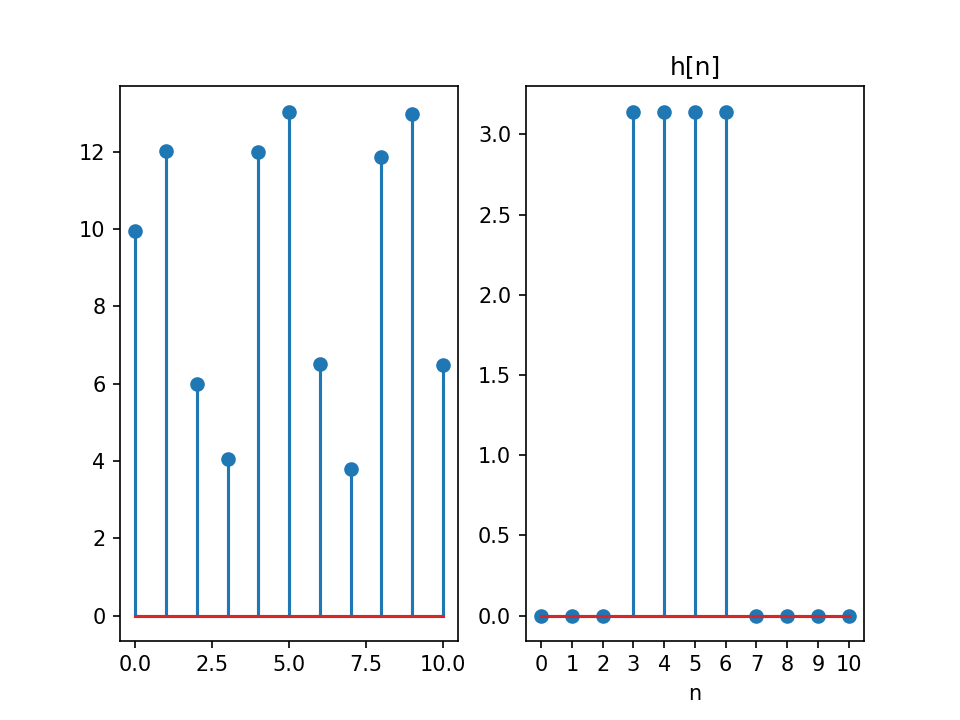

In [41]:
def unit(x):
    if np.any(x)>=0:
        return 1
    else:
        return 0

n = np.arange(0, 11, 1)
hn = (-1.92) * np.power(0.5, n) * unit(n) + (6.76)*np.exp(-1j*0.5) * np.power(np.exp(1j*np.pi/4), n) * unit(n) + (6.76)*np.exp(1j*0.5) * np.power(np.exp(-1j*np.pi/4), n) * unit(n)
plt.figure()
plt.subplot(121)
plt.stem(n, np.abs(hn))
plt.subplot(122)
plt.stem(n, np.angle(hn))
plt.xlabel('n')
plt.xticks(n)
plt.title('h[n]')
plt.show()

$H[z] = \frac{10(1-\frac{1}{\sqrt{2}}z^{-1})}{(1-e^{j\frac{\pi}{4}}z^{-1})(1-e^{-j\frac{\pi}{4}}z^{-1})(1-0.5z^{-1})}$

<IPython.core.display.Javascript object>


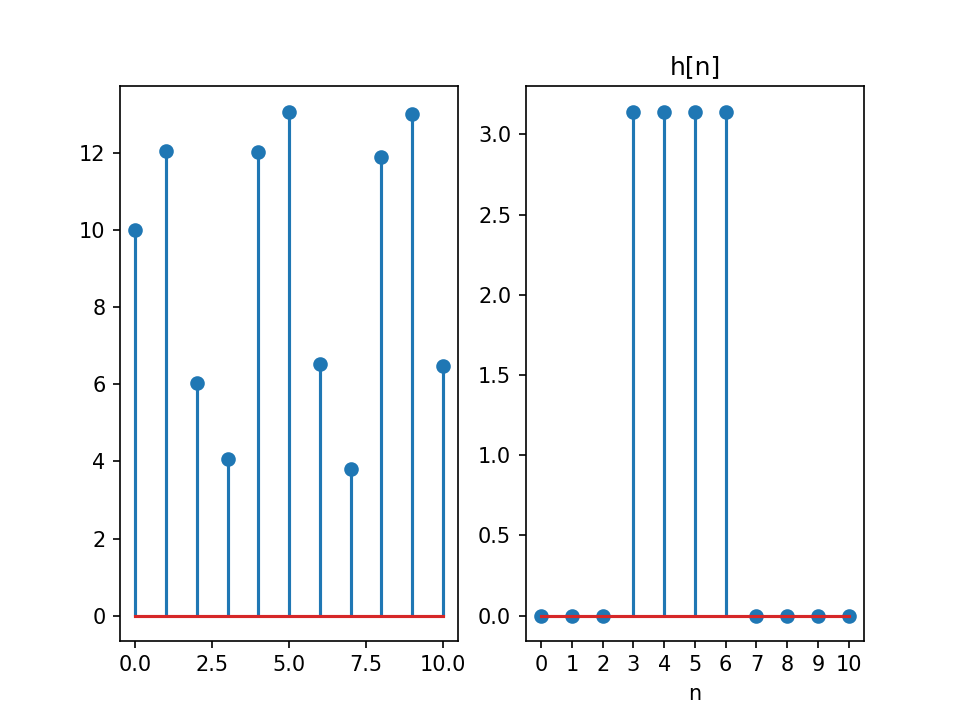

In [42]:
#Like in warm up example2
num = np.array([10, -7.071, 0, 0]) #Numerator coefficients
denum = np.array([1, -1.914, 1.707, -0.5])#Denominator coefficients
n, h = sgnl.dimpulse((num, denum, 1),x0=0, n=11)
h = np.squeeze(h)
plt.figure()
plt.subplot(121)
plt.stem(n,np.abs(h))
plt.subplot(122)
plt.stem(n,np.angle(h))
plt.xticks(n)
plt.xlabel('n')
plt.title('h[n]')
plt.show()

<IPython.core.display.Javascript object>


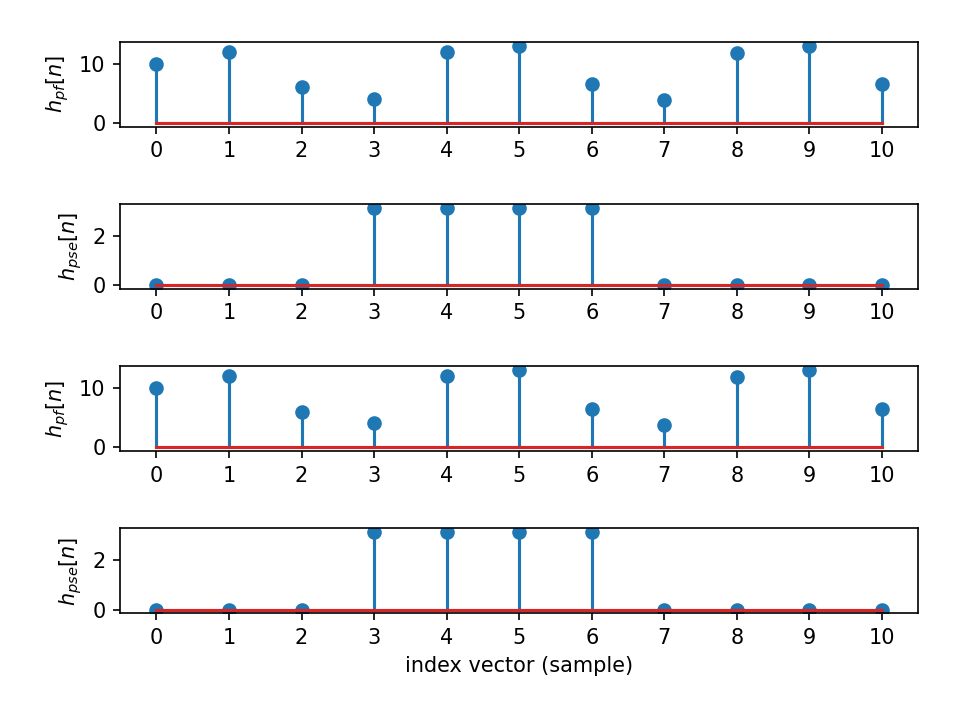

In [43]:
#Like in warm up example3, we compare
n = np.arange(0,11,1) # define the index vector for 10 points
hpf = (-1.92) * np.power(0.5, n) * unit(n) + (6.76)*np.exp(-1j*0.5) * np.power(np.exp(1j*np.pi/4), n) * unit(n) + (6.76)*np.exp(1j*0.5) * np.power(np.exp(-1j*np.pi/4), n) * unit(n)
num = np.array([10, -7.071, 0, 0]) #Numerator coefficients
denum = np.array([1, -1.914, 1.707, -0.5])#Denominator coefficients
n, hpse = sgnl.dimpulse((num, denum, 1),x0=0, n=11)
hpse = np.squeeze(hpse)

plt.figure()
plt.subplot(4,1,1), plt.stem(n, np.abs(hpf)), plt.ylabel('$h_{pf}[n]$'), plt.xticks(n)
plt.subplot(4,1,2), plt.stem(n, np.angle(hpf)), plt.ylabel('$h_{pse}[n]$'), plt.xticks(n)
plt.subplot(4,1,3), plt.stem(n, np.abs(hpse)), plt.ylabel('$h_{pf}[n]$'), plt.xticks(n)
plt.subplot(4,1,4), plt.stem(n, np.angle(hpse)), plt.ylabel('$h_{pse}[n]$'), plt.xticks(n)
plt.xlabel('index vector (sample)')
plt.tight_layout(pad =2.0)
plt.show()

When analytically solved, we find h[n] = $6.76 * e^{-j0.5} * (e^{j\frac{\pi}{4}})^n *u[n] + 6.76 * e^{j0.5} * (e^{-j\frac{\pi}{4}})^n *u[n] + (-1.92)(0.5)^n * u[n]$ because H(z) = $\frac{6.76 * e^{-j0.5}}{1-e^{j\frac{\pi}{4}}z^{-1}} + \frac{6.76 * e^{j0.5}}{1-e^{-j\frac{\pi}{4}}z^{-1}} + \frac{-1.92}{1-0.5z^{-1}}$

<IPython.core.display.Javascript object>


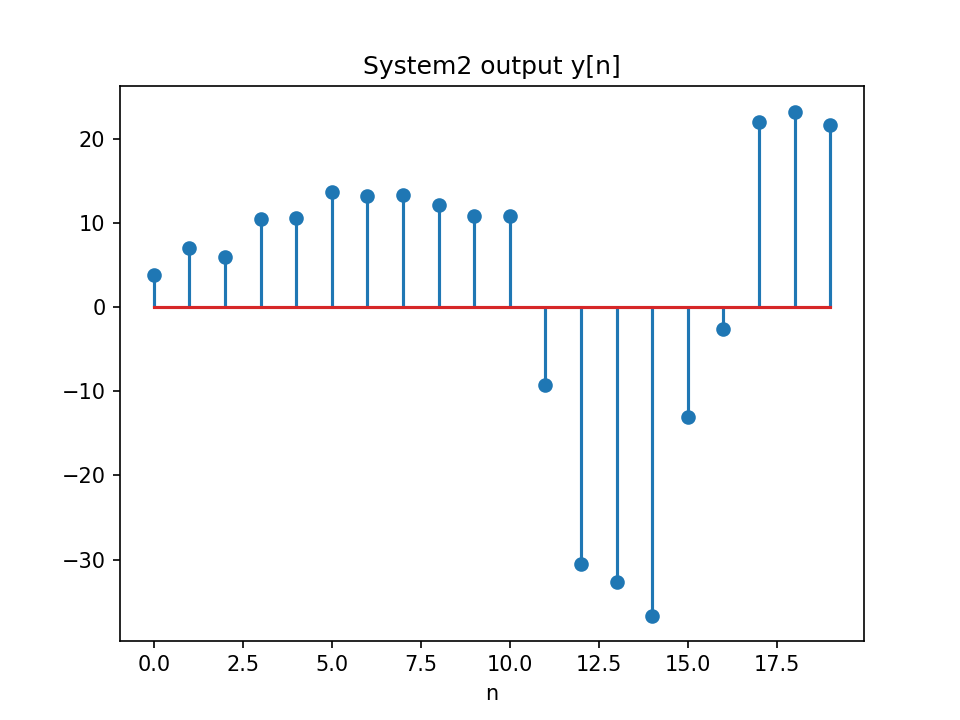

<IPython.core.display.Javascript object>


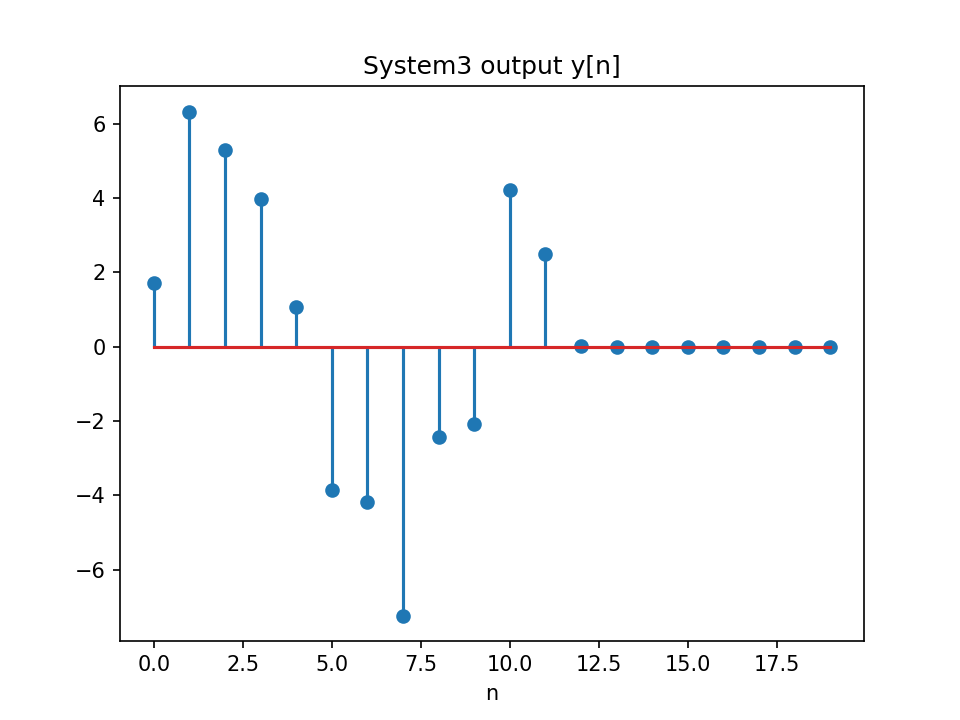

<IPython.core.display.Javascript object>


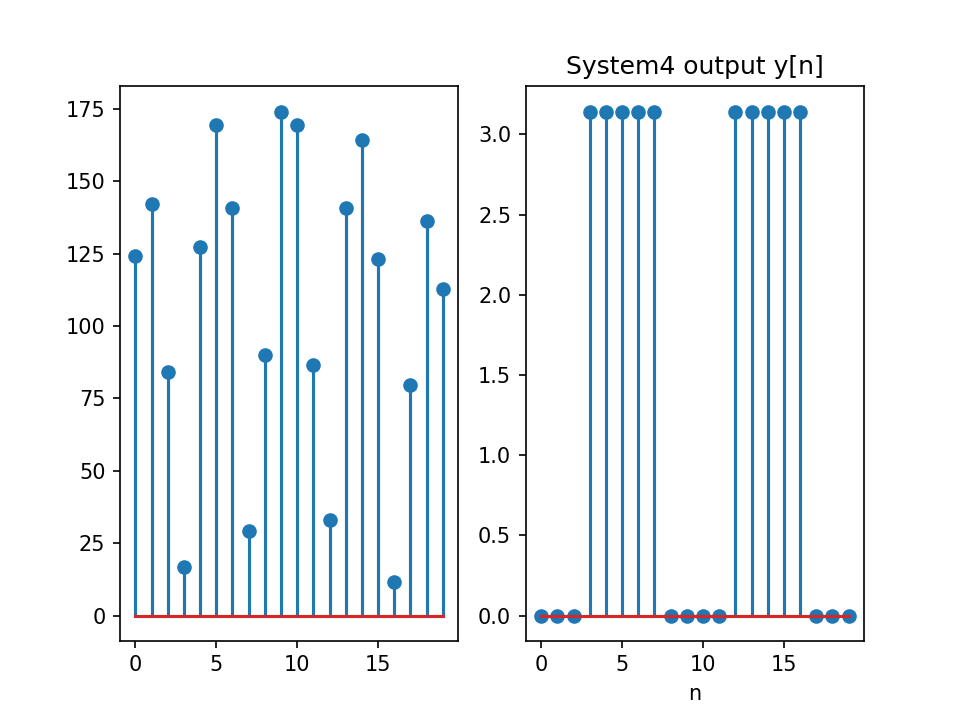

In [44]:
import numpy as np
n = np.arange(0, 20, 1)
xn = 2*np.cos(0.2*np.pi*n) + np.sin(0.9*np.pi*n)
hn1 = 0.25 * np.power(-1, (n-1), dtype = float) * step_eksi_bir(n) + 0.75 * step_eksi_bir(n) + 0.5 * (n-1) * step_eksi_bir(n)
hn2 = sgnl.unit_impulse(20) + 2 * sgnl.unit_impulse(20, 1) + np.power(-1/3, n, dtype = float) * step_eksi_bir(n) + 0.5 * np.power(-0.5, n-1, dtype = float) * step_eksi_bir(n)
hn3 = (-1.92) * np.power(0.5, n) * unit(n) + (6.76)*np.exp(-1j*0.5) * np.power(np.exp(1j*np.pi/4), n) * unit(n) + (6.76)*np.exp(1j*0.5) * np.power(np.exp(-1j*np.pi/4), n) * unit(n)

yn1 = sgnl.convolve(hn1, xn, 'same')
plt.figure()
plt.stem(n, yn1)
plt.xlabel('n')
plt.title('System2 output y[n]')
plt.show()

yn2 = sgnl.convolve(hn2, xn, 'same')
plt.figure()
plt.stem(n, yn2)
plt.xlabel('n')
plt.title('System3 output y[n]')
plt.show()

yn3 = sgnl.convolve(hn3, xn, 'same')
plt.figure()
plt.subplot(121)
plt.stem(n, np.abs(yn3))
plt.subplot(122)
plt.stem(n, np.angle(yn3))
plt.xlabel('n')
plt.title('System4 output y[n]')
plt.show()